In [1]:
##Importing all the required libraries
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
# Loading weights 
file_weights = 'weights'
file = open(file_weights, 'rb')
weights = pickle.load(file)
file.close()

In [3]:
#Loading prices
file_prices = 'prices'
file = open(file_prices, 'rb')
prices = pickle.load(file)
file.close()

In [4]:
#Loading carts
file_carts = 'carts'
file = open(file_carts, 'rb')
carts = pickle.load(file)
file.close()

In [5]:
#Loading adjacency lists
file_adj_list = 'adj_list'
file = open(file_adj_list, 'rb')
list_of_adj_lists= pickle.load(file)
file.close()

In [6]:
#Loading f values
file_f = 'f'
file = open(file_f, 'rb')
f = pickle.load(file)
file.close()

In [7]:
#Loading g values
file_g = 'g'
file = open(file_g, 'rb')
g = pickle.load(file)
file.close()

In [12]:
#In node greedy price of 1 item must be changed at a time. Since threshold is of 7%
#Change in price is generated re=andomly
delta_u=random.uniform(0,0.07)
print(delta_u)

0.0031954555355915683


In [13]:
#Creating a list of dictionaries.
#A dictionary corresponding to each experiment is created
#key->product
#value->revenue of the product
temp_dict=dict()
original_revenue_dict_list=[]
for experiment in range(10):
    revenue_dict=temp_dict.copy()
    for product in range(500):
        x=0
        x+=(prices[product]*f[experiment][product])
        for neighbour in list_of_adj_lists[experiment][product]:
            if(product<neighbour):
                x+=(prices[product]*g[experiment][(product,neighbour)])
            else:
                x+=(prices[product]*g[experiment][(neighbour,product)])
        revenue_dict[product]=x
    original_revenue_dict_list.append(revenue_dict)       

In [14]:
#Implementing Heuristic 1 (Node Greedy)
#One by one price of each item is updated

revenue_list=[]
for i in range(200):#no. of iterations=200 since we are changing price of upto 200 items
    print(i)   
    max_revenue=-1
    flag=-1
    for product in range(500):#Changing price of 1 item at a time
        product_revenue=0
        for experiment in range(10):
            original_price=prices[product]
            new_price=original_price*(1+delta_u)
            temp_dict=original_revenue_dict_list[experiment]
            temp_revenue=new_price*f[experiment][product]*(1-delta_u)
            for neighbours in list_of_adj_lists[experiment][product]:
                if(product<neighbours):
                    temp_revenue+=new_price*g[experiment][(product,neighbours)]*(1-weights[product]*delta_u)
                else:
                    temp_revenue+=new_price*g[experiment][(neighbours,product)]*(1-weights[product]*delta_u)
            product_revenue+=sum(temp_dict.values())-temp_dict[product]+temp_revenue #Updated revenue is calculated with the new price of the item
        product_revenue/=10 #Average across all the 10 networks
        if(product_revenue>max_revenue): #We need to change the price of the item for which we get the maximum revenue
            max_revenue=product_revenue
            flag=product  
    #Updating the price and revenue because of the product selected
    prices[flag]*=(1+delta_u)
    for experiment in range(10):
        original_revenue_dict_list[experiment][flag]=prices[flag]*((f[experiment][flag]*(1-delta_u)))
        for neighbours in list_of_adj_lists[experiment][flag]:
            if(flag<neighbours):
                original_revenue_dict_list[experiment][flag]+=prices[flag]*g[experiment][(flag,neighbours)]*(1-weights[flag]*delta_u)
            else:
                original_revenue_dict_list[experiment][flag]+=prices[flag]*g[experiment][(neighbours,flag)]*(1-weights[flag]*delta_u)
    print(max_revenue)    
    revenue_list.append(max_revenue)

0
5483059.084058963
1
5483116.603621125
2
5483174.306984493
3
5483232.19473639
4
5483290.267466025
5
5483348.525764487
6
5483406.970224751
7
5483465.601441687
8
5483524.420012071
9
5483583.426534583
10
5483642.621609812
11
5483702.005840272
12
5483761.5798304
13
5483821.344186565
14
5483881.299517071
15
5483941.446432172
16
5484001.785544066
17
5484062.317466908
18
5484123.042816818
19
5484183.962211884
20
5484245.076272167
21
5484306.385619713
22
5484367.890878553
23
5484429.592674713
24
5484491.4916362185
25
5484553.588393104
26
5484615.883577414
27
5484678.377823217
28
5484741.071766602
29
5484803.966045697
30
5484867.061300663
31
5484930.358173711
32
5484993.857309103
33
5485057.559353159
34
5485121.4649542635
35
5485185.574762875
36
5485249.889431528
37
5485314.409614847
38
5485379.135969542
39
5485444.069154426
40
5485509.209830415
41
5485574.558660538
42
5485640.116309941
43
5485705.883445898
44
5485771.860737815
45
5485838.048857232
46
5485904.448477843
47
5485971.060275489
48


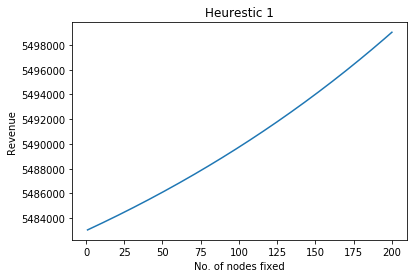

In [15]:
#Plotting the line graph
x_axis=[i+1 for i in range(200)]
plt.plot(x_axis,revenue_list)
plt.xlabel("No. of nodes fixed")
plt.ylabel("Revenue")
plt.title("Heurestic 1")
plt.show()


In [16]:
#Storing the results in a pickle file
file_result = 'result'
outfile7 = open(file_result,'wb')
pickle.dump(revenue_list,outfile7)
outfile7.close()

In [18]:
# Loading results plotted in final plot
file_results = 'result_final'
file = open(file_results , 'rb')
y_axis = pickle.load(file)
file.close()

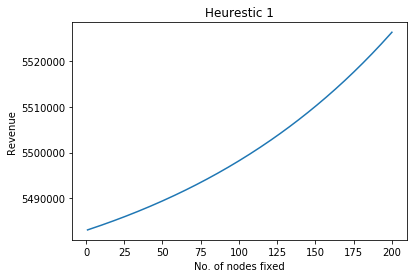

In [19]:
#Plotting the line graph used in final plot
x_axis=[i+1 for i in range(200)]
plt.plot(x_axis,y_axis)
plt.xlabel("No. of nodes fixed")
plt.ylabel("Revenue")
plt.title("Heurestic 1")
plt.show()